**EDGE DETECTION**

**METHODS IN EDGE DETECTION:**

a. Gradient Operators (First-Order Derivative).
This method detects edges by calculating changes in pixel intensity (gradient). Commonly used operators include:

*  Sobel: Uses horizontal and vertical kernels to detect intensity changes in the vertical and horizontal directions.
*  Prewitt: Similar to Sobel but uses different kernels.
*  Roberts: Uses a 2x2 kernel to more sensitively detect diagonal edges.


b. Laplacian (Second-Order Derivative)
This method detects edges by finding points where the second derivative changes sign (zero-crossing). It allows edge detection without considering the gradient direction.

c. Canny Edge Detector
A robust and efficient edge detection method, carried out in several stages:

*  Noise Reduction: Uses a Gaussian filter to smooth the image and reduce noise.
*  Gradient Calculation: Determines the magnitude and direction of pixel intensity changes.
*  Non-Maximum Suppression: Thins detected edges by keeping only the pixels that are local maxima of the gradient.
*  Hysteresis Thresholding: Uses two threshold values (minimum and maximum) to connect strong edges and filter out weak ones.

**Operator Gradien**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from io import BytesIO
import os

In [ ]:
def read_image(path):
    img = mpimg.imread(path)
    if img.ndim == 3:
        img_gray = img[..., 0] * 0.2989 + img[..., 1] * 0.5870 + img[..., 2] * 0.1140
    else:
        img_gray = img
    return img_gray

In [ ]:
def convolve2d(image, kernel):
    m, n = kernel.shape
    y, x = image.shape
    output = np.zeros((y - m + 1, x - n + 1))
    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            region = image[i:i+m, j:j+n]
            output[i, j] = np.sum(region * kernel)
    return output

In [ ]:
# Operator Sobel
sobel_x = np.array([[ -1,  0,  1],
                    [ -2,  0,  2],
                    [ -1,  0,  1]])
sobel_y = np.array([[  1,  2,  1],
                    [  0,  0,  0],
                    [ -1, -2, -1]])

In [ ]:
# Operator Prewitt
prewitt_x = np.array([[ -1,  0,  1],
                      [ -1,  0,  1],
                      [ -1,  0,  1]])
prewitt_y = np.array([[  1,  1,  1],
                      [  0,  0,  0],
                      [ -1, -1, -1]])

In [ ]:
# Operator Roberts
roberts_x = np.array([[ 1,  0],
                      [ 0, -1]])
roberts_y = np.array([[ 0,  1],
                      [-1,  0]])

In [ ]:
image_path = 'images.jpeg'
img = read_image(image_path)

In [ ]:
def edge_magnitude(gx, gy):
    return np.sqrt(gx**2 + gy**2)

In [ ]:
sobel_gx = convolve2d(img, sobel_x)
sobel_gy = convolve2d(img, sobel_y)
sobel_edge = edge_magnitude(sobel_gx, sobel_gy)

In [ ]:
prewitt_gx = convolve2d(img, prewitt_x)
prewitt_gy = convolve2d(img, prewitt_y)
prewitt_edge = edge_magnitude(prewitt_gx, prewitt_gy)

In [ ]:
roberts_gx = convolve2d(img, roberts_x)
roberts_gy = convolve2d(img, roberts_y)
roberts_edge = edge_magnitude(roberts_gx, roberts_gy)

In [ ]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

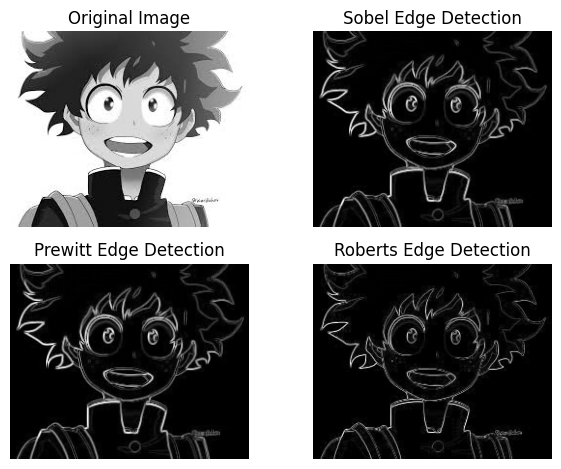

In [ ]:
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(sobel_edge, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(prewitt_edge, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(roberts_edge, cmap='gray')
plt.title('Roberts Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

**Laplacian**

In [ ]:
laplacian_kernel = np.array([[0,  1, 0],
                             [1, -4, 1],
                             [0,  1, 0]])

In [ ]:
laplacian_edge = convolve2d(img, laplacian_kernel)

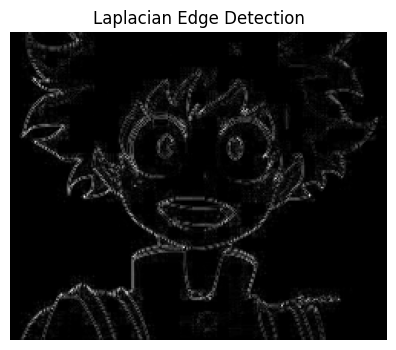

In [ ]:
plt.figure(figsize=(6,4))
plt.imshow(np.abs(laplacian_edge), cmap='gray')
plt.title('Laplacian Edge Detection')
plt.axis('off')
plt.show()

**Canny Edge Detector**

In [ ]:
# Gaussian Blur kernel 5x5 (σ = 1.0)
def gaussian_kernel(size=5, sigma=1.0):
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))
    return kernel / np.sum(kernel)

In [ ]:
# Non-maximum suppression
def non_max_suppression(gradient, direction):
    Z = np.zeros_like(gradient)
    angle = direction * 180. / np.pi
    angle[angle < 0] += 180

    for i in range(1, gradient.shape[0]-1):
        for j in range(1, gradient.shape[1]-1):
            q = 255
            r = 255

            # Horizontal edge
            if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                q = gradient[i, j+1]
                r = gradient[i, j-1]
            # Diagonal /
            elif (22.5 <= angle[i,j] < 67.5):
                q = gradient[i+1, j-1]
                r = gradient[i-1, j+1]
            # Vertical
            elif (67.5 <= angle[i,j] < 112.5):
                q = gradient[i+1, j]
                r = gradient[i-1, j]
            # Diagonal
            elif (112.5 <= angle[i,j] < 157.5):
                q = gradient[i-1, j-1]
                r = gradient[i+1, j+1]

            if (gradient[i,j] >= q) and (gradient[i,j] >= r):
                Z[i,j] = gradient[i,j]
            else:
                Z[i,j] = 0

    return Z

In [ ]:
# Hysteresis thresholding
def threshold(image, low, high):
    M, N = image.shape
    res = np.zeros((M,N), dtype=np.int32)

    strong = 255
    weak = 50

    strong_i, strong_j = np.where(image >= high)
    weak_i, weak_j = np.where((image <= high) & (image >= low))

    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak

    # Tracking edges by hysteresis
    for i in range(1, M-1):
        for j in range(1, N-1):
            if res[i,j] == weak:
                if ((res[i+1, j-1] == strong) or (res[i+1, j] == strong) or (res[i+1, j+1] == strong)
                    or (res[i, j-1] == strong) or (res[i, j+1] == strong)
                    or (res[i-1, j-1] == strong) or (res[i-1, j] == strong) or (res[i-1, j+1] == strong)):
                    res[i,j] = strong
                else:
                    res[i,j] = 0
    return res


In [ ]:
blur_kernel = gaussian_kernel(5, 1)
blurred = convolve2d(img, blur_kernel)

In [ ]:
gx = convolve2d(blurred, sobel_x)
gy = convolve2d(blurred, sobel_y)

gradient_magnitude = np.hypot(gx, gy)
gradient_magnitude = gradient_magnitude / gradient_magnitude.max() * 255

gradient_direction = np.arctan2(gy, gx)

In [ ]:
nms = non_max_suppression(gradient_magnitude, gradient_direction)

In [ ]:
canny_final = threshold(nms, 30, 90)

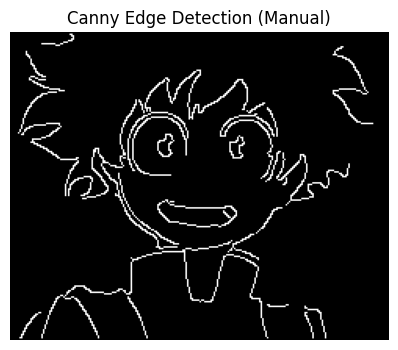

In [ ]:
plt.figure(figsize=(6,4))
plt.imshow(canny_final, cmap='gray')
plt.title('Canny Edge Detection (Manual)')
plt.axis('off')
plt.show()